## UPLOADING AND PREPROCESSING

In [ ]:
from google.colab import files

uploaded = files.upload()

!unzip archive.zip

Saving archive.zip to archive.zip
Archive:  archive.zip
  inflating: customers.csv           
  inflating: orders.csv              
  inflating: products.csv            
  inflating: sales.csv               


In [ ]:
#columns needed: 1.state from customers.csv
#2. paymemnt from orders.csv
#3. customer_id as primary key

In [ ]:
import pandas as pd

df=pd.read_csv('customers.csv')
df2=pd.read_csv('orders.csv')

print(df.shape, df2.shape)

df_hc=pd.merge(df,df2, on='customer_id')
df_hc

(1000, 9) (1000, 5)


,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,payment,order_date,delivery_date
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,24550,2021-4-4,2021-04-06
1,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,10246,2021-3-6,2021-04-01
2,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,729,35593,2021-2-18,2021-03-01
3,7,Winslow Ewbanck,Bigender,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland,Australia,465,48935,2021-5-21,2021-05-23
4,10,Susanetta Wilshin,Bigender,70,615 Hayley KnollSuite 454,2118,Joelburgh,Western Australia,Australia,595,45626,2021-3-9,2021-03-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,286,18840,2021-1-5,2021-01-08
996,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,404,45215,2021-3-3,2021-03-09
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,586,15870,2021-2-27,2021-03-22
998,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,773,21349,2021-7-19,2021-08-07


In [ ]:

df3=pd.merge(df,df2, on='customer_id').iloc[:,[0,2,3,7,10]]
df3.sample(10)

,customer_id,gender,age,state,payment
674,665,Genderfluid,61,Australian Capital Territory,55727
612,620,Male,35,Australian Capital Territory,31712
247,272,Genderqueer,22,Victoria,47553
301,328,Non-binary,59,Western Australia,43066
487,501,Genderqueer,73,Tasmania,52930
88,96,Genderfluid,41,New South Wales,40619
835,812,Male,28,Western Australia,55461
811,791,Agender,34,Queensland,35453
67,78,Genderqueer,38,Northern Territory,53949
363,401,Non-binary,73,Western Australia,33692


In [ ]:
df3.isnull().sum()

customer_id    0
gender         0
age            0
state          0
payment        0
dtype: int64

In [ ]:
#label encoding:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df3['gender']= label_encoder.fit_transform(df['gender'])

df3.sample(10)


,customer_id,gender,age,state,payment
689,681,4,79,Victoria,58179
648,644,3,46,Western Australia,57755
494,508,5,65,Northern Territory,18584
909,893,1,57,Western Australia,27329
793,776,6,24,Australian Capital Territory,43888
866,843,1,23,South Australia,21858
929,914,1,39,South Australia,43972
81,89,7,51,Queensland,21446
115,117,3,75,Tasmania,10698
185,207,6,56,Queensland,14658


## K-MEANS ON AGE AND PAYMENT

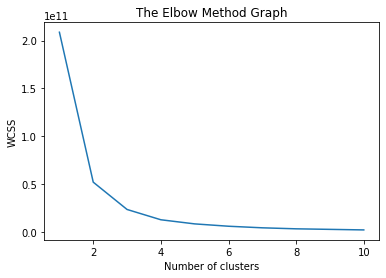

In [ ]:
import matplotlib.pyplot as plt

X=df3.iloc[:,[2 ,4,]].values

from sklearn.cluster import KMeans
wcss=[] # wccs is 'within cluster sum of squares'
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=42) #random_state makes sure that we always get same numbers everytime we rerun the code
    kmeans.fit(X) # fits the modelcompute k-means clustering
    wcss.append(kmeans.inertia_) # sum of squared distances of samples to their closest cluster center.

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

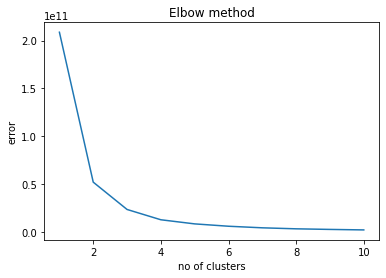

In [ ]:
error=[]

for i in range (1,11):
  kmeans=KMeans(n_clusters=i).fit(X)
  kmeans.fit(X)
  error.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clusters')
plt.ylabel('error')
plt.show()

In [ ]:
#k=3
#getting 3 as the elbow point!
kmeans=KMeans(n_clusters=3)

y_kmeans=kmeans.fit_predict(X)

print(y_kmeans)

#df3['cluster']=y_kmeans

kmeans.cluster_centers_

[1 1 2 0 0 2 2 2 0 0 2 2 2 0 2 0 1 2 1 2 1 1 0 0 2 0 0 2 1 2 2 1 1 0 2 2 1
 2 1 0 0 1 2 0 1 1 2 1 1 2 0 2 2 2 2 0 2 1 2 1 2 1 2 0 1 2 2 0 0 1 1 2 1 1
 0 0 0 0 2 1 0 1 2 1 2 2 1 0 2 1 2 0 1 0 2 0 1 2 0 2 1 1 2 1 1 1 1 1 2 1 1
 0 0 1 1 1 2 0 0 0 1 2 1 0 0 2 0 2 1 2 2 1 0 2 2 0 0 0 1 0 0 2 2 2 0 0 2 0
 1 1 0 2 1 0 2 0 2 1 2 0 2 2 0 0 1 0 2 0 2 0 0 1 2 0 1 2 2 1 0 2 0 0 1 0 0
 1 1 0 1 2 2 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 2 2 0 0 1 0 1 1 1 0 1 0
 2 1 2 0 2 0 0 1 0 1 0 2 2 0 0 2 1 0 1 0 1 2 2 0 0 0 2 2 0 0 1 0 0 2 0 1 1
 1 2 0 2 2 2 0 1 1 0 2 1 0 2 2 0 2 0 2 1 0 1 1 1 2 0 1 1 1 0 1 2 1 2 0 2 2
 2 2 2 0 0 0 1 0 0 0 0 2 2 0 1 2 1 0 2 2 2 0 2 0 1 1 2 1 1 2 2 2 1 0 1 0 2
 0 1 1 1 1 2 2 1 2 2 0 2 1 0 2 2 2 2 1 1 2 1 2 2 2 1 1 1 1 1 2 2 1 0 0 2 2
 0 2 1 2 2 2 0 0 2 0 1 1 2 1 2 0 0 2 2 2 1 0 2 2 1 1 0 2 2 1 0 1 1 2 2 2 0
 2 0 1 0 1 0 1 2 2 2 1 1 0 2 0 2 2 0 1 2 0 1 2 0 2 2 1 2 2 2 0 0 2 0 1 2 0
 0 2 1 1 1 1 1 1 1 2 2 1 0 1 1 0 0 0 1 0 2 2 2 1 0 2 0 2 1 0 2 1 1 1 2 0 1
 2 0 0 0 2 1 0 2 1 0 1 1 

array([[4.88953846e+01, 5.09745723e+04],
       [4.84970930e+01, 1.76785203e+04],
       [4.94078550e+01, 3.42138640e+04]])

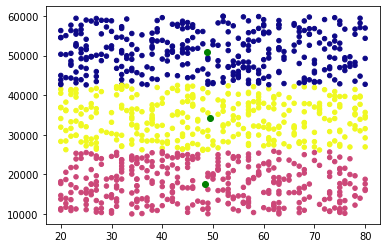

In [ ]:


plt.scatter(X[:,0], X[:,1], c=y_kmeans , cmap='plasma', s=20)    #s=seed
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],  c='green')
plt.show()

In [ ]:
#--import mpld3
#scatter=plt.scatter(X[:,0], X[:,1], c=y_kmeans , cmap='plasma', s=100)    #s=seed
#centroids=kmeans.cluster_centers_
#plt.scatter(centroids[:,0], centroids[:,1],  c='green', hover_data=['cluster', 'Category', 'Y', 'X'])
#tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
#mpld3.plugins.connect(fig, tooltip)

#mpld3.show()

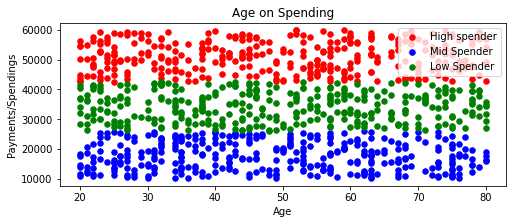

In [ ]:
plt.figure(figsize=(8,3))
plt.scatter(X[y_kmeans== 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'High spender') #s is size of point
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Mid Spender')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Low Spender')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income/High Spending')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income/High Spending')

plt.title('Age on Spending')
plt.xlabel('Age')
plt.ylabel('Payments/Spendings')
plt.legend(loc=0)
plt.show()

## K-MEANS ONPRODUCT AND SALES ANALYSIS


In [ ]:
df4=pd.read_csv('products.csv')
df5=pd.read_csv('sales.csv')

df4['product_id']=df4['product_ID']
df4.shape, df5.shape

((1260, 9), (5000, 6))

In [ ]:
df_sales=pd.merge(df4,df5, on='product_id').iloc[:,[1,2,3,4,8,11,12,13]]
df_sales

,product_type,product_name,size,colour,product_id,price_per_unit,quantity_y,total_price
0,Shirt,Oxford Cloth,S,red,1,96,3,288
1,Shirt,Oxford Cloth,S,red,1,96,1,96
2,Shirt,Oxford Cloth,S,red,1,96,3,288
3,Shirt,Oxford Cloth,S,red,1,96,2,192
4,Shirt,Oxford Cloth,S,red,1,96,3,288
...,...,...,...,...,...,...,...,...
4995,Trousers,Tracksuit Bottoms,L,violet,1258,112,1,112
4996,Trousers,Tracksuit Bottoms,XL,violet,1259,112,3,336
4997,Trousers,Tracksuit Bottoms,XL,violet,1259,112,3,336
4998,Trousers,Tracksuit Bottoms,XL,violet,1259,112,2,224


In [ ]:
#label encoding:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_sales['product_type']= label_encoder.fit_transform(df_sales['product_type'])

df_sales['size']= label_encoder.fit_transform(df_sales['size'])

df_sales['product_name']= label_encoder.fit_transform(df_sales['product_name'])


df_sales.head(10)

,product_type,product_name,size,colour,product_id,price_per_unit,quantity_y,total_price
0,1,21,2,red,1,96,3,288
1,1,21,2,red,1,96,1,96
2,1,21,2,red,1,96,3,288
3,1,21,2,red,1,96,2,192
4,1,21,2,red,1,96,3,288
5,1,21,1,red,2,96,3,288
6,1,21,1,red,2,96,2,192
7,1,21,1,red,2,96,1,96
8,1,21,1,red,2,96,2,192
9,1,21,1,red,2,96,1,96


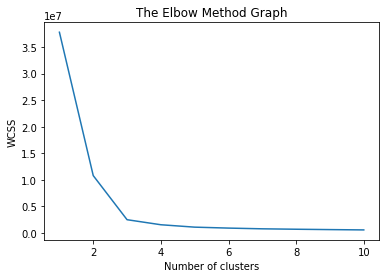

In [ ]:
import matplotlib.pyplot as plt

X2=df_sales.iloc[:,[1,7,]].values

from sklearn.cluster import KMeans
wcss=[] # wccs is 'within cluster sum of squares'
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=42) #random_state makes sure that we always get same numbers everytime we rerun the code
    kmeans.fit(X2) # fits the modelcompute k-means clustering
    wcss.append(kmeans.inertia_) # sum of squared distances of samples to their closest cluster center.

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#k=3
#getting 3 as the elbow point!
kmeans=KMeans(n_clusters=3
              )

y_kmeans=kmeans.fit_predict(X2)

print(y_kmeans)

#df3['cluster']=y_kmeans

kmeans.cluster_centers_

[1 0 1 ... 1 2 2]


array([[ 16.7822923 , 103.40994542],
       [ 17.02731223, 311.55865922],
       [ 16.85402299, 206.52643678]])

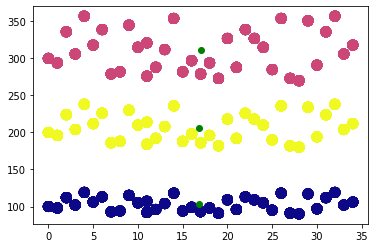

In [ ]:


plt.scatter(X2[:,0], X2[:,1], c=y_kmeans , cmap='plasma', s=100)    #s=seed
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1] ,  c='green')
plt.show()

No handles with labels found to put in legend.


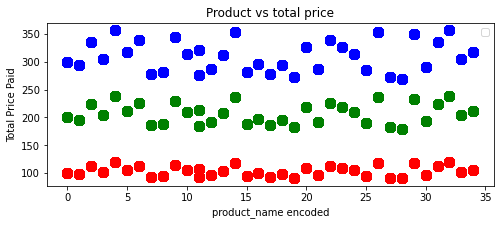

In [ ]:
plt.figure(figsize=(8,3))
plt.scatter(X2[y_kmeans== 0, 0], X2[y_kmeans == 0, 1], s = 100, c = 'red', label = '') #s is size of point
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 100, c = 'blue', label = '')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 100, c = 'green', label = '')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income/High Spending')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income/High Spending')

plt.title('Product vs total price')
plt.xlabel('product_name encoded')
plt.ylabel('Total Price Paid')
plt.legend(loc=0)
plt.show()

## Hierarchial Clustering ON CITY AND PAYMENT:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import normalize


df_hc['gender']= label_encoder.fit_transform(df_hc['gender'])
df_hc['customer_name']= label_encoder.fit_transform(df_hc['customer_name'])
df_hc['city']= label_encoder.fit_transform(df_hc['city'])
df_hc['state']= label_encoder.fit_transform(df_hc['state'])


data_scaled=pd.DataFrame(normalize(df_hc.iloc[:,[0,1,2,3,6,7,9,10]]), columns=df_hc.columns[[0,1,2,3,6,7,9,10]])
data_scaled


,customer_id,customer_name,gender,age,city,state,order_id,payment
0,0.000041,0.014456,0.000081,0.001222,0.007900,0.000081,0.018528,0.999692
1,0.000097,0.034547,0.000195,0.002919,0.018879,0.000195,0.065201,0.997091
2,0.000028,0.009971,0.000056,0.000843,0.005449,0.000056,0.020476,0.999725
3,0.000143,0.012362,0.000020,0.001553,0.005905,0.000061,0.009501,0.999860
4,0.000219,0.011921,0.000022,0.001534,0.004142,0.000153,0.013039,0.999834
...,...,...,...,...,...,...,...,...
995,0.052871,0.026170,0.000371,0.001695,0.011231,0.000159,0.015151,0.998079
996,0.022065,0.010922,0.000155,0.000707,0.004687,0.000066,0.008932,0.999646
997,0.062684,0.031028,0.000440,0.002010,0.013316,0.000188,0.036806,0.996781
998,0.046651,0.023092,0.000327,0.001496,0.009910,0.000140,0.036133,0.997940


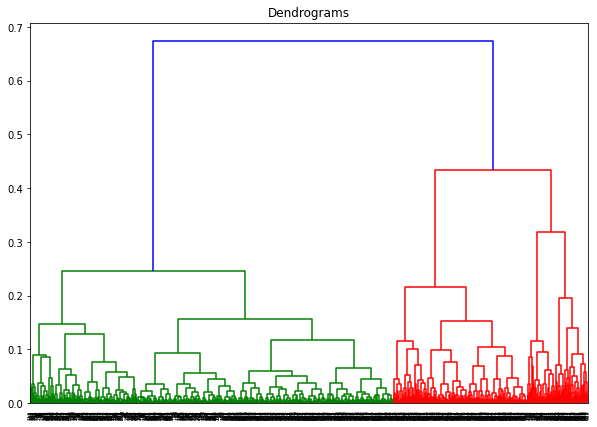

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

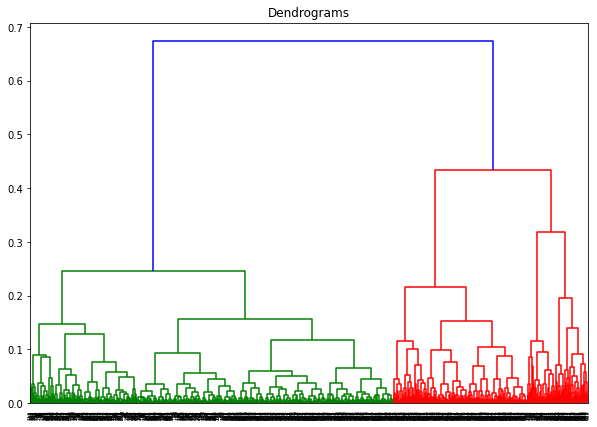

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Text(0, 0.5, 'Payment')

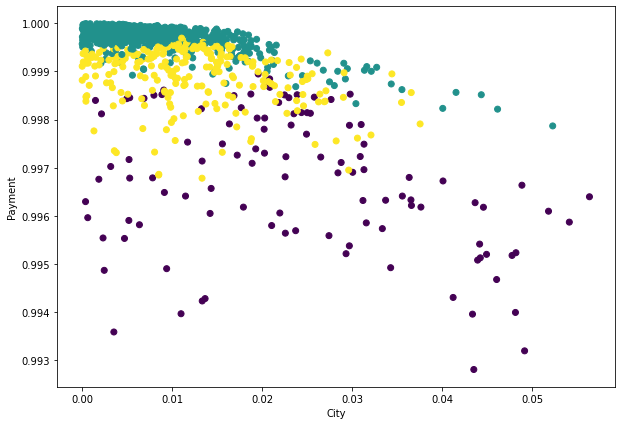

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['city'], data_scaled['payment'], c=cluster.labels_) 
plt.xlabel('City')
plt.ylabel('Payment')

## DBSCAN clustering on age and city


In [ ]:
np.array(data_scaled.iloc[:,[1,3]])

array([[0.01445583, 0.00122162],
       [0.03454687, 0.00291945],
       [0.00997113, 0.00084263],
       ...,
       [0.0310277 , 0.00200989],
       [0.02309159, 0.00149581],
       [0.01088354, 0.00199158]])

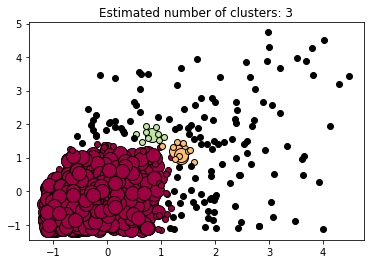

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(
#    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
#)
X=np.array(data_scaled.iloc[:,[3,4]])

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()